# SANJAI I 
# 20BIT0371
# ADS ASSIGNMENT 3

## Importing libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## 2. Load the dataset into the tool.

In [2]:
df=pd.read_csv('Housing.csv')

In [3]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,furnished


In [4]:
df.shape

(545, 12)

## 3. Perform Below Visualizations.
● Univariate Analysis ● Bi - Variate Analysis ● Multi - Variate Analysis

<Axes: xlabel='price', ylabel='Count'>

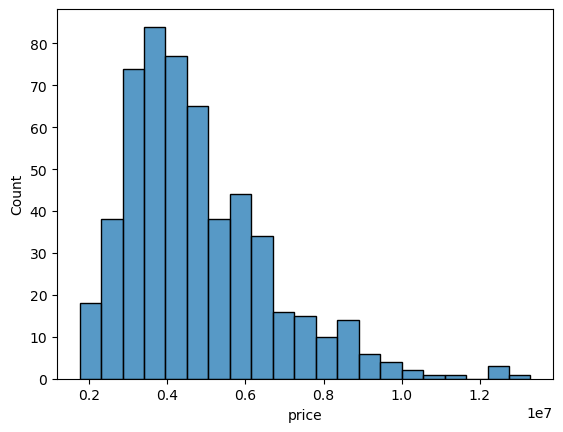

In [5]:
# Univariate analysis

# Histogram

sns.histplot(df['price'])

<Axes: xlabel='area', ylabel='count'>

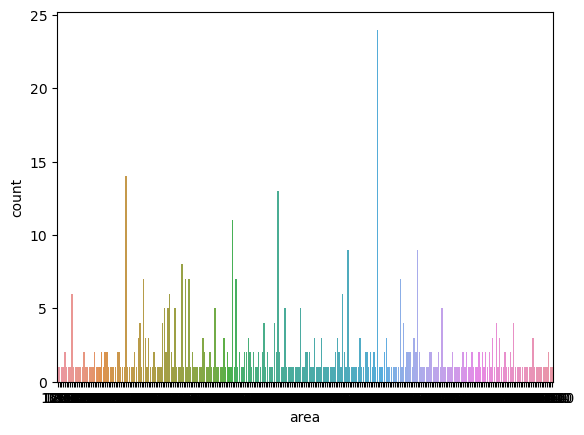

In [6]:
import seaborn as sns 
sns.countplot(data=df,x='area')

<Axes: ylabel='furnishingstatus'>

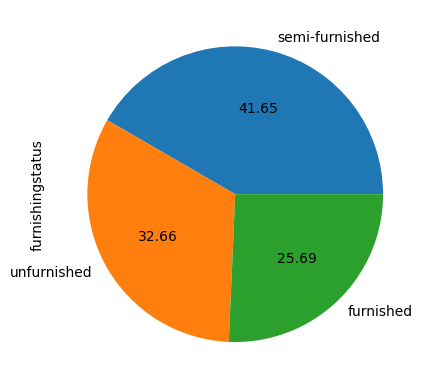

In [7]:
#piechart on gender 

df['furnishingstatus'].value_counts().plot(kind="pie",autopct="%.2f")

<Axes: >

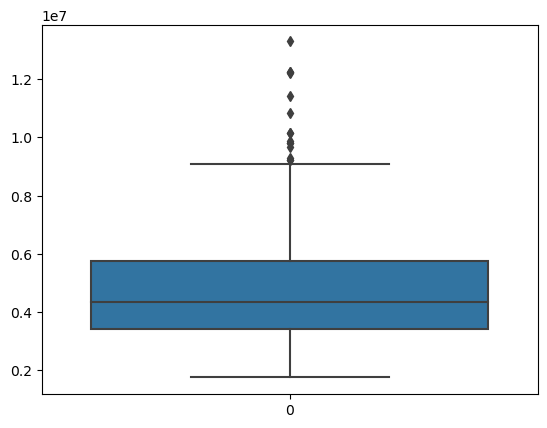

In [8]:
sns.boxplot(df['price'])

<Axes: xlabel='price', ylabel='furnishingstatus'>

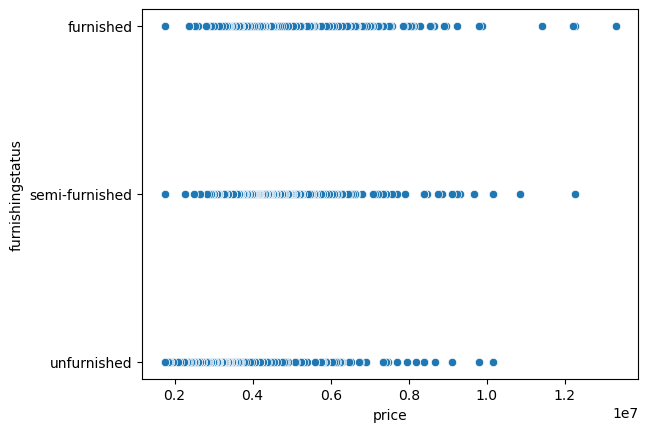

In [9]:
# Bivariate analysis

# Scatter plot
sns.scatterplot(data=df,x="price",y="furnishingstatus")

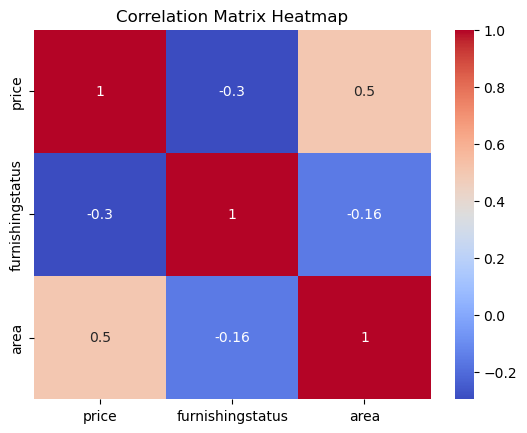

In [61]:
# Multivariate Analysis

correlation_matrix = df[['price', 'furnishingstatus', 'area']].corr()

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix Heatmap")
plt.show()

## 4. Perform descriptive statistics on the dataset.

In [62]:
# Mean
df.mean()

price               4.593489e+06
area                4.972341e+03
bedrooms            2.917431e+00
bathrooms           1.280734e+00
stories             1.655046e+00
mainroad            8.587156e-01
guestroom           1.779817e-01
basement            3.504587e-01
hotwaterheating     4.587156e-02
airconditioning     3.155963e-01
parking             6.935780e-01
furnishingstatus    1.069725e+00
dtype: float64

In [63]:
df.median()

price               4340000.0
area                   4600.0
bedrooms                  3.0
bathrooms                 1.0
stories                   2.0
mainroad                  1.0
guestroom                 0.0
basement                  0.0
hotwaterheating           0.0
airconditioning           0.0
parking                   0.0
furnishingstatus          1.0
dtype: float64

In [64]:
df.mode()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,4340000,6000,3,1,2,1,0,0,0,0,0,1


In [65]:
df.max()

price               9100000
area                  10500
bedrooms                  4
bathrooms                 3
stories                   3
mainroad                  1
guestroom                 1
basement                  1
hotwaterheating           1
airconditioning           1
parking                   3
furnishingstatus          2
dtype: int64

In [66]:
df.min()

price               1750000
area                   1650
bedrooms                  1
bathrooms                 1
stories                   1
mainroad                  0
guestroom                 0
basement                  0
hotwaterheating           0
airconditioning           0
parking                   0
furnishingstatus          0
dtype: int64

In [67]:
# range

ran=df.max()-df.min()
ran

price               7350000
area                   8850
bedrooms                  3
bathrooms                 2
stories                   2
mainroad                  1
guestroom                 1
basement                  1
hotwaterheating           1
airconditioning           1
parking                   3
furnishingstatus          2
dtype: int64

In [68]:
df.var()

price               2.479172e+12
area                3.369209e+06
bedrooms            4.325081e-01
bathrooms           2.390583e-01
stories             3.697585e-01
mainroad            1.215461e-01
guestroom           1.465731e-01
basement            2.280559e-01
hotwaterheating     4.384781e-02
airconditioning     2.163923e-01
parking             7.423300e-01
furnishingstatus    5.796883e-01
dtype: float64

In [69]:
df.std()

price               1.574539e+06
area                1.835540e+03
bedrooms            6.576535e-01
bathrooms           4.889359e-01
stories             6.080777e-01
mainroad            3.486347e-01
guestroom           3.828487e-01
basement            4.775519e-01
hotwaterheating     2.093987e-01
airconditioning     4.651799e-01
parking             8.615858e-01
furnishingstatus    7.613727e-01
dtype: float64

In [70]:
quantile=df['price'].quantile(q=[0.75,0.25,0.50])
quantile

0.75    5565000.0
0.25    3430000.0
0.50    4340000.0
Name: price, dtype: float64

## 5. Check for Missing values and deal with them.

In [22]:
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
furnishingstatus    0
dtype: int64

## 6. Find the outliers and replace them outliers

In [71]:
columns=['price','area','bedrooms','bathrooms','stories','mainroad','guestroom','basement','hotwaterheating','airconditioning','parking','furnishingstatus']
for column in columns:
  q1=df[column].quantile(0.25)
  q3=df[column].quantile(0.75)
  IQR =q3-q1
  lowerbound=q1-(1.5*IQR)
  upperbound=q3+(1.5*IQR)
  # print(column,q1,q3,IQR,lowerbound,upperbound)


  #outliers
  outliers = df[(df[column] < lowerbound) | (df[column] > upperbound)]
  print(column,outliers)
  #replacing with median
  df.loc[(df[column] < lowerbound) | (df[column] > upperbound), column] = df[column].median()


price       price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
15  9100000  6000         4          1        2         1          0   
16  9100000  6600         4          2        2         1          1   
17  8960000  8500         3          2        2         1          0   
18  8890000  4600         3          2        2         1          1   
19  8855000  6420         3          2        2         1          0   

    basement  hotwaterheating  airconditioning  parking  furnishingstatus  
15         1                0                0        2                 1  
16         1                0                1        1                 2  
17         0                0                1        2                 0  
18         0                0                1        2                 0  
19         0                0                1        1                 1  
area        price   area  bedrooms  bathrooms  stories  mainroad  guestroom  \
82   6615000  10500       

## 7. Check for Categorical columns and perform encoding.

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  furnishingstatus  545 non-null    object
dtypes: int64(6), object(6)
memory usage: 51.2+ KB


In [25]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

In [26]:
df.mainroad=le.fit_transform(df.mainroad)
df.guestroom=le.fit_transform(df.guestroom)
df.basement=le.fit_transform(df.basement)
df.hotwaterheating=le.fit_transform(df.hotwaterheating)
df.airconditioning=le.fit_transform(df.airconditioning)
df.furnishingstatus=le.fit_transform(df.furnishingstatus)

In [27]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,4340000,7420,4,2,3,1,0,0,0,1,2,0
1,4340000,8960,4,1,2,1,0,0,0,1,3,0
2,4340000,9960,3,2,2,1,0,1,0,0,2,1
3,4340000,7500,4,2,2,1,0,1,0,1,3,0
4,4340000,7420,4,1,2,1,1,1,0,1,2,0


## 8. Split the data into dependent and independent variables.

In [28]:
X = df.drop('price', axis=1)  
y = df['price'] 

In [29]:
X

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,7420,4,2,3,1,0,0,0,1,2,0
1,8960,4,1,2,1,0,0,0,1,3,0
2,9960,3,2,2,1,0,1,0,0,2,1
3,7500,4,2,2,1,0,1,0,1,3,0
4,7420,4,1,2,1,1,1,0,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,1,0,1,0,0,2,2
541,2400,3,1,1,0,0,0,0,0,0,1
542,3620,2,1,1,1,0,0,0,0,0,2
543,2910,3,1,1,0,0,0,0,0,0,0


In [30]:
y

0      4340000
1      4340000
2      4340000
3      4340000
4      4340000
        ...   
540    1820000
541    1767150
542    1750000
543    1750000
544    1750000
Name: price, Length: 545, dtype: int64

## 9. Scale the independent variables


In [31]:
name=X.columns
name

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'parking',
       'furnishingstatus'],
      dtype='object')

In [32]:
from sklearn.preprocessing import MinMaxScaler

min_max=MinMaxScaler()

In [33]:
X_scaled=min_max.fit_transform(X)

In [34]:
X_scaled

array([[0.6519774 , 1.        , 0.5       , ..., 1.        , 0.66666667,
        0.        ],
       [0.8259887 , 1.        , 0.        , ..., 1.        , 1.        ,
        0.        ],
       [0.93898305, 0.66666667, 0.5       , ..., 0.        , 0.66666667,
        0.5       ],
       ...,
       [0.22259887, 0.33333333, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.14237288, 0.66666667, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.24858757, 0.66666667, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [35]:
x=pd.DataFrame(X_scaled,columns=name)
x

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,0.651977,1.000000,0.5,1.0,1.0,0.0,0.0,0.0,1.0,0.666667,0.0
1,0.825989,1.000000,0.0,0.5,1.0,0.0,0.0,0.0,1.0,1.000000,0.0
2,0.938983,0.666667,0.5,0.5,1.0,0.0,1.0,0.0,0.0,0.666667,0.5
3,0.661017,1.000000,0.5,0.5,1.0,0.0,1.0,0.0,1.0,1.000000,0.0
4,0.651977,1.000000,0.0,0.5,1.0,1.0,1.0,0.0,1.0,0.666667,0.0
...,...,...,...,...,...,...,...,...,...,...,...
540,0.152542,0.333333,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.666667,1.0
541,0.084746,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.5
542,0.222599,0.333333,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,1.0
543,0.142373,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


## 10. Split the data into training and testing

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

## 11. Build the Model

In [38]:
# Model Building
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

## 12. Train the Model

In [39]:
lr.fit(X_train,y_train)

LinearRegression()

## 13. Test the Model

In [40]:
y_pred=lr.predict(X_test)

In [41]:
y_pred

array([4196058.89282128, 5558954.12559219, 4741558.88746372,
       4882100.07999112, 3050356.46511124, 7152640.21402219,
       3346986.67477542, 3200561.36993319, 3060356.60972142,
       7201507.02649389, 5791639.32564765, 4114662.97432151,
       3975524.50332686, 5036046.03310682, 4242818.5650605 ,
       2235644.69556146, 4212343.11273072, 4007516.33789536,
       3277336.04783928, 4767914.26953027, 5972325.70459674,
       6081903.80469255, 5001137.65020638, 3034494.90162604,
       4846075.48750053, 5839976.53415419, 4642063.10619094,
       5764326.55495218, 5261702.91341653, 5484929.76568897,
       3539241.12264704, 5479604.15012456, 6513304.99302152,
       3193882.8426424 , 4076203.63394831, 5075484.64742199,
       4892828.85412373, 3870827.79796837, 3352159.68153863,
       4186823.71610817, 6945188.98022369, 4594321.08485025,
       5611188.45717346, 3864584.50801092, 3263532.77919981,
       6289867.8329962 , 4924704.69994137, 3122602.54784876,
       4197527.59134191,

In [42]:
y_test

239    4585000
113    6083000
325    4007500
66     6930000
479    2940000
        ...   
76     6650000
132    5810000
311    4123000
464    3080000
155    5530000
Name: price, Length: 109, dtype: int64

In [44]:
from sklearn.metrics import r2_score
acc=r2_score(y_pred,y_test)
acc

0.3022888782505101

## 14. Measure the performance using Metrics.

In [45]:
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error

In [46]:
# Error

E=y_test-y_pred
E

239    3.889411e+05
113    5.240459e+05
325   -7.340589e+05
66     2.047900e+06
479   -1.103565e+05
           ...     
76    -3.995486e+02
132    3.845006e+05
311   -8.019290e+04
464   -1.652124e+06
155    1.991648e+05
Name: price, Length: 109, dtype: float64

In [47]:
# Squared Error

se=E*E
se

239    1.512752e+11
113    2.746241e+11
325    5.388425e+11
66     4.193894e+12
479    1.217855e+10
           ...     
76     1.596391e+05
132    1.478407e+11
311    6.430902e+09
464    2.729512e+12
155    3.966660e+10
Name: price, Length: 109, dtype: float64

In [48]:
# Mean squared error

mse=np.mean(se)
mse

999699705714.862

In [49]:
mse2=mean_squared_error(y_test,y_pred)
mse2

999699705714.862

In [50]:
# Mean Absolute Error
mae=mean_absolute_error(y_test,y_pred)
mae

730858.9301361126

In [51]:
# Root Mean Square Error
rmse=np.sqrt(mse2)
rmse

999849.841583656

In [52]:
# R-Squared
r2=r2_score(y_test,y_pred)
r2

0.5366315124088297

## Logistic Regression

In [53]:
from sklearn.linear_model import LogisticRegression
Lr=LogisticRegression()

In [55]:
Lr.fit(X_train,y_train)

LogisticRegression()

In [56]:
pred=lr.predict(X_test)

In [57]:
pred1=lr.predict(X_train)

In [72]:
from sklearn.metrics import r2_score
acc=r2_score(y_test,y_pred)
acc

0.5366315124088297